# Análisis Exploratorio de Datos

Fecha: 25 de febrero de 2025

Integrantes:
* Fernando Mendoza Velasco
* Mónica Lizette Cardona Solís
* Marianna Montserrat Curiel Zambrano

## Descripción del dataset
Se presenta un conjunto de datos proveniente de investigaciones y estudios experimentales en nanotecnología y ciencia de materiales. Estos se utilizan para analizar las propiedades de los átomos, sus estructuras y sus afectaciones a diversas propiedades electrónicas.

## Descripción de las variables

- **atom_count**: Cantidad de átomos en la nanopartícula. Tipo de dato: Entero.
- **structure_type**: Tipo de estructura del átomo o material. Tipo de dato: String.
- **atomic_number**: Número atómico del elemento químico (78 Platino, 79 Oro). Tipo de dato: Entero.
- **electronegativity**: Medida de la tendencia de un átomo a atraer electrones en un enlace químico. Tipo de dato: Flotante.
- **atomic_radius**: Medida del radio atómico, expresada en Angstroms. Tipo de dato: Flotante.
- **melting_point**: Punto de fusión del material, expresado en Kelvin. Tipo de dato: Flotante.
- __dos_pc*n*__: Componentes principales de Densidad de Estado (DOS) (n = 1, 2,...,50). Tipo de dato: Flotante.
- **target_property**: Propiedad objetivo que se busca predecir. Tipo de dato: Flotante.

## Descripción básica y estadística descriptiva

In [38]:
import pandas as pd

PATH_DATASET = "./dataset/agricultural_production.csv"

# Cargar los datos del CSV en un dataframe de Pandas.
df = pd.read_csv(PATH_DATASET)

# Mostrar las primeras 5 filas del dataset.
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [39]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


El dataset no contiene valores incompletos o nulos, lo cual facilita el análisis de los valores usando el método `describe()`. Las estadísticas descriptivas básicas del dataset permiten identificar los rangos de los valores y una idea inicial de su distribución.

In [41]:
# Estadísticas descriptivas básicas del conjunto de datos.
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Visualización de datos

A continuación se presentan visualizaciones estadísticas básicas de las columnas principales del conjunto de datos. Las variables numéricas _N_, _P_, _K_, _temperature_, _humidity_, _ph_ y _rainfall_ se describen con gráficos de línea.

Como se pudo ver anteriormente, la columna _label_ tiene una distribución uniforme con 100 registros para cada producto agrícola. 

In [42]:
from math import ceil
import matplotlib.pyplot as plt

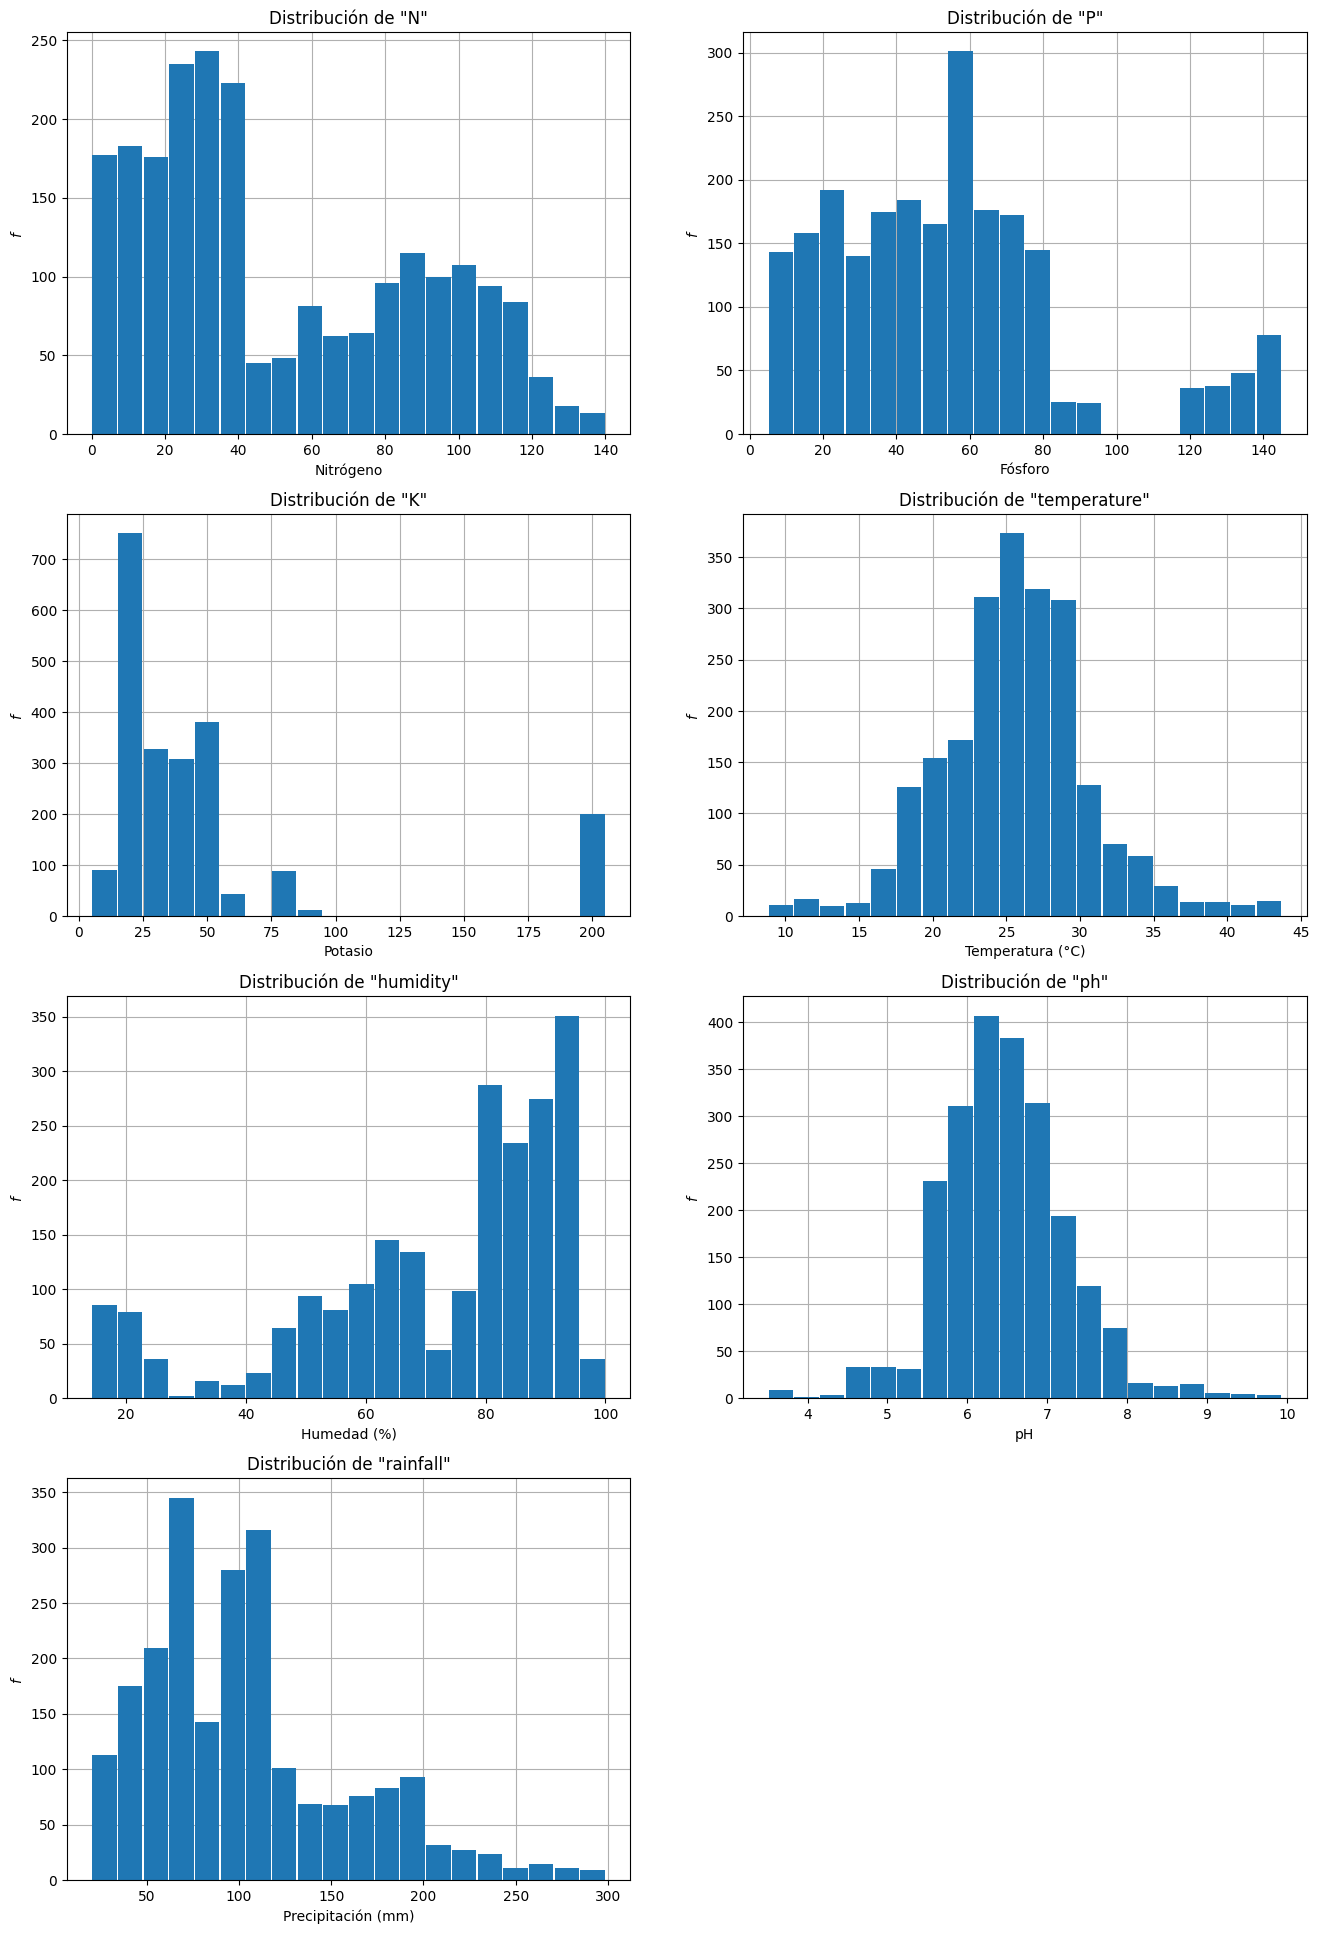

In [43]:
columnas_visualizadas = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
labels = ["Nitrógeno", "Fósforo", "Potasio", "Temperatura (°C)", "Humedad (%)", "pH", "Precipitación (mm)"]

NUM_COLUMNS_IN_FIGURE = 2
NUM_ROWS_IN_FIGURE = ceil(len(columnas_visualizadas) / NUM_COLUMNS_IN_FIGURE)

fig, axes = plt.subplots(NUM_ROWS_IN_FIGURE, NUM_COLUMNS_IN_FIGURE)
fig.set_size_inches(16, NUM_ROWS_IN_FIGURE * 6)

i =  0
for row in axes:
    for ax in row:
        if i < len(columnas_visualizadas):
            ax.hist(df[columnas_visualizadas[i]], bins=20, rwidth=0.95, zorder=2)
            ax.set_title(f"Distribución de \"{columnas_visualizadas[i]}\"")
            ax.set_xlabel(labels[i])
            ax.set_ylabel(r"$f$")
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1
        
plt.savefig("graficas/histogramas.png", dpi=300)

plt.show()

Los histogramas para las variables _temperature_ y _ph_ tienen distribuciones uniformes, sin valores atípicos notables.

Por otro lado, las demás columnas tienen distribuciones sesgadas, principalmente hacia la derecha. Sus medidas de tendencia central se encuentran hacia la izquierda del eje horizontal y tienen valores atípicos de poca frecuencia hacia la derecha del mismo eje.

## Correlación

Un mapa de calor es una herramienta útil para visualizar la matriz correlación de los datos. Todas las columnas excepto una (_label_) son numéricas, entonces puede generarse la matriz de correlación sin la necesidad de transformarlas.

Para incluir _label_ en la matriz de correlación, se asigna un número entero a cada etiqueta única con el tipo de cultivo. Por ejemplo, se asigna el valor 0 a "rice" y 1 a "maize".

In [44]:
label_map = { label: index for index, label in enumerate(df["label"].unique())}
display(label_map)

df_labels_numericos = df.copy()
df_labels_numericos["label"] = df_labels_numericos["label"].apply(lambda label: label_map[label])
df_labels_numericos.head()

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


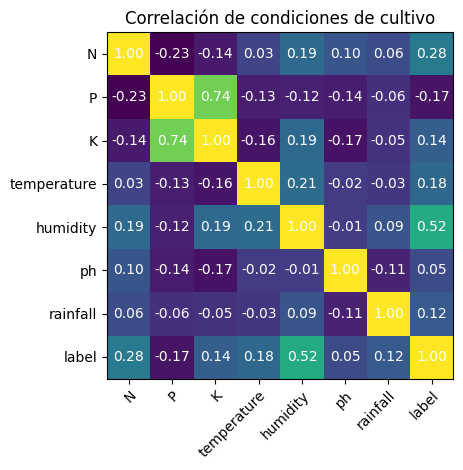

In [45]:
columnas_visualizadas = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall", "label"]

matriz_correlacion = df_labels_numericos[columnas_visualizadas].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes y en cada recuadro del mapa.
ax.set_xticks(range(len(columnas_visualizadas)), labels=columnas_visualizadas, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(columnas_visualizadas)), labels=columnas_visualizadas)

for i in range(len(columnas_visualizadas)):
    for j in range(len(columnas_visualizadas)):
        text = ax.text(j, i, f"{matriz_correlacion.iloc[i].iloc[j]:.2f}", ha="center", va="center", color="w")

ax.set_title("Correlación de condiciones de cultivo")
fig.tight_layout()

plt.savefig("graficas/mapa_correlacion.png", dpi=300)
plt.show()

Si se considera un solo tipo de cultivo ("rice" en este caso), la matriz de correlación y su mapa de calor son los siguientes:

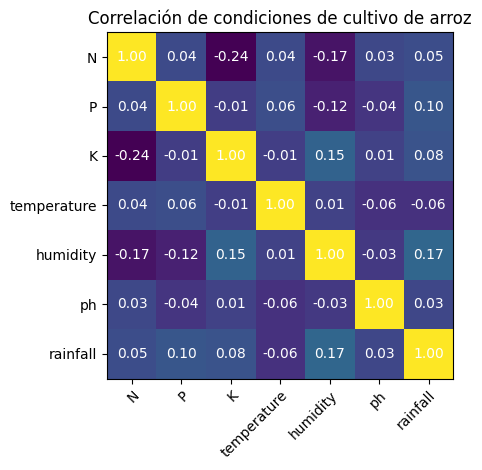

In [46]:
columnas_visualizadas = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

df_solo_arroz = df[df["label"] == "rice"]
matriz_correlacion = df_solo_arroz[columnas_visualizadas].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion)

# Agregar anotaciones en los ejes y en cada recuadro del mapa.
ax.set_xticks(range(len(columnas_visualizadas)), labels=columnas_visualizadas, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(columnas_visualizadas)), labels=columnas_visualizadas)

for i in range(len(columnas_visualizadas)):
    for j in range(len(columnas_visualizadas)):
        text = ax.text(j, i, f"{matriz_correlacion.iloc[i].iloc[j]:.2f}", ha="center", va="center", color="w")

ax.set_title("Correlación de condiciones de cultivo de arroz")
fig.tight_layout()

plt.savefig("graficas/mapa_correlacion_arroz.png", dpi=300)
plt.show()

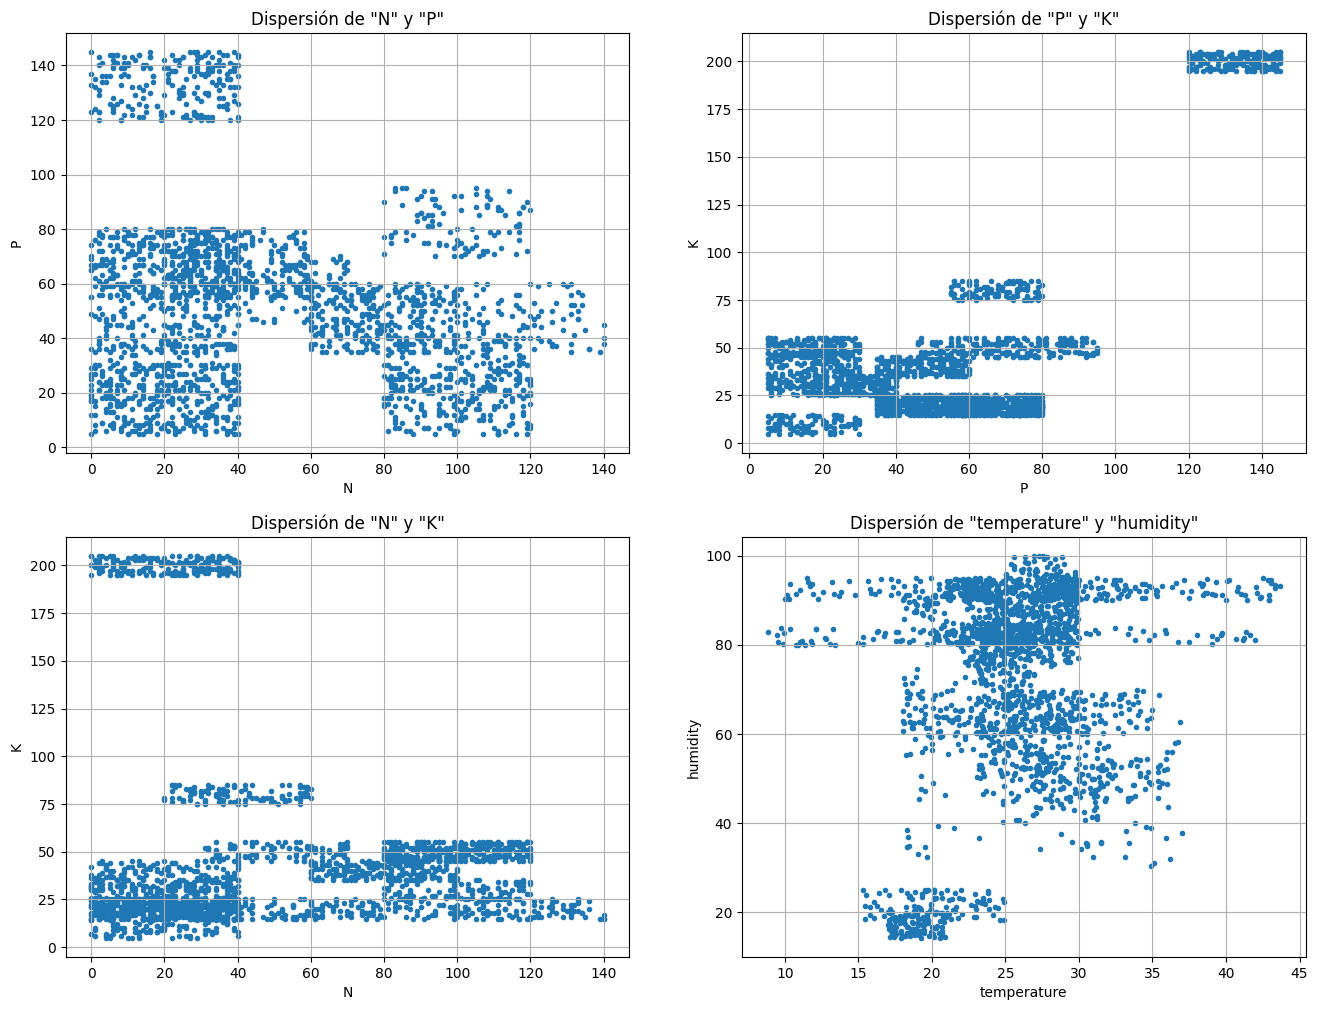

In [52]:
variables_relacionadas = [
    ("N", "P"), 
    ("P", "K"), 
    ("N", "K"), 
    ("temperature", "humidity"),
]

num_rows_in_figure = ceil(len(variables_relacionadas) // 2)

fig, axes = plt.subplots(num_rows_in_figure, 2)
fig.set_size_inches(16, num_rows_in_figure * 6)

i = 0
for row in axes:
    for ax in row:
        col1, col2 = variables_relacionadas[i]
        if i < len(variables_relacionadas):
            ax.scatter(df[col1], df[col2], marker=".")
            ax.set_title(f"Dispersión de \"{col1}\" y \"{col2}\"")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

plt.savefig("graficas/scatter_1.png", dpi=300)
plt.show()

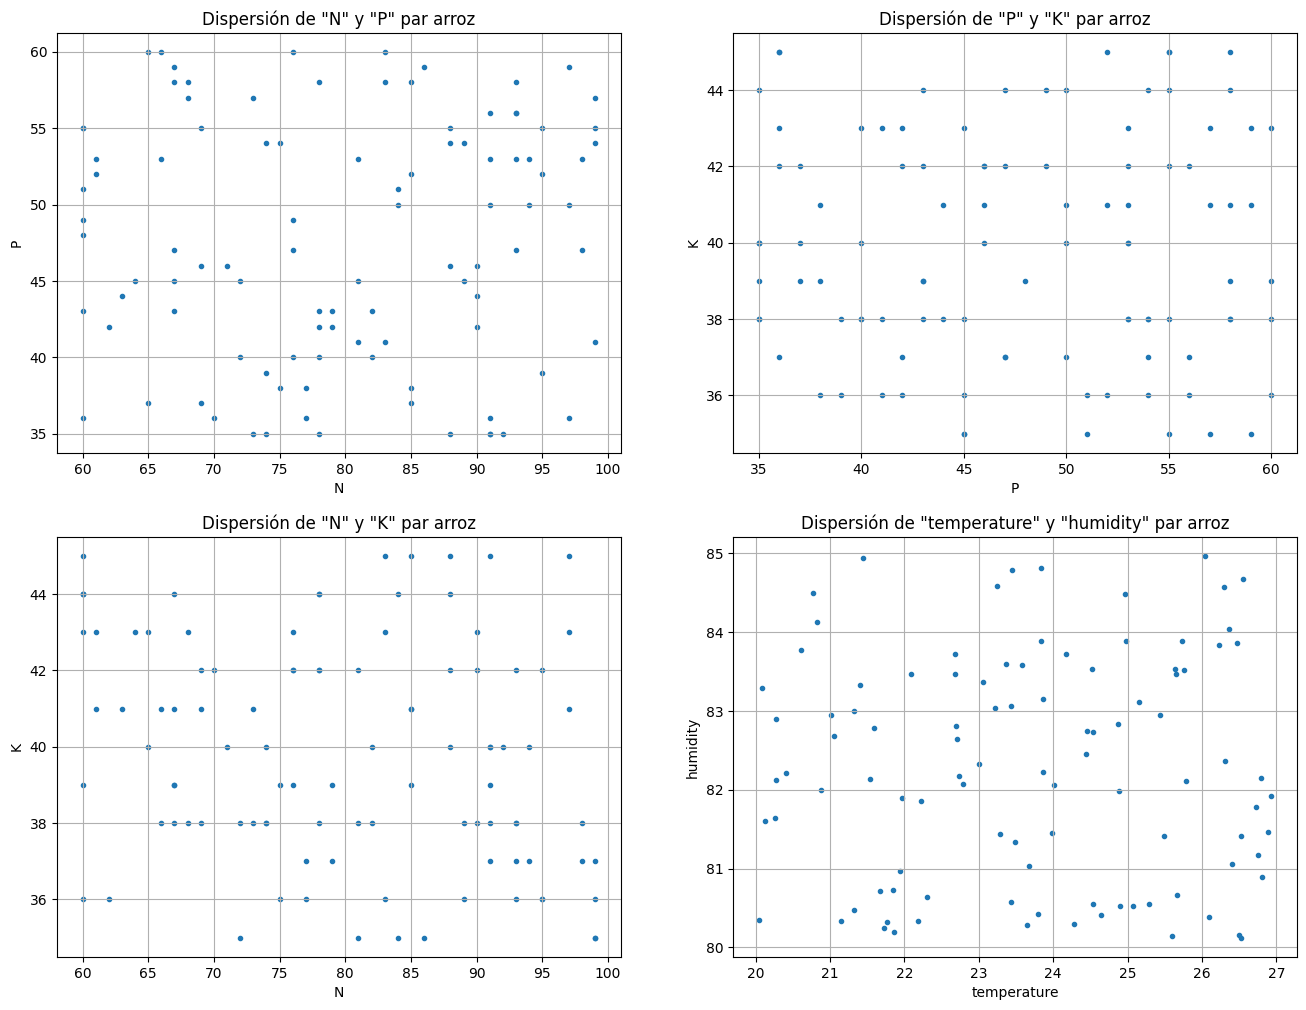

In [53]:
fig, axes = plt.subplots(num_rows_in_figure, 2)
fig.set_size_inches(16, num_rows_in_figure * 6)

i = 0
for row in axes:
    for ax in row:
        col1, col2 = variables_relacionadas[i]
        if i < len(variables_relacionadas):
            ax.scatter(df_solo_arroz[col1], df_solo_arroz[col2], marker=".")
            ax.set_title(f"Dispersión de \"{col1}\" y \"{col2}\" par arroz")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

plt.savefig("graficas/scatter_1_arroz.png", dpi=300)
plt.show()

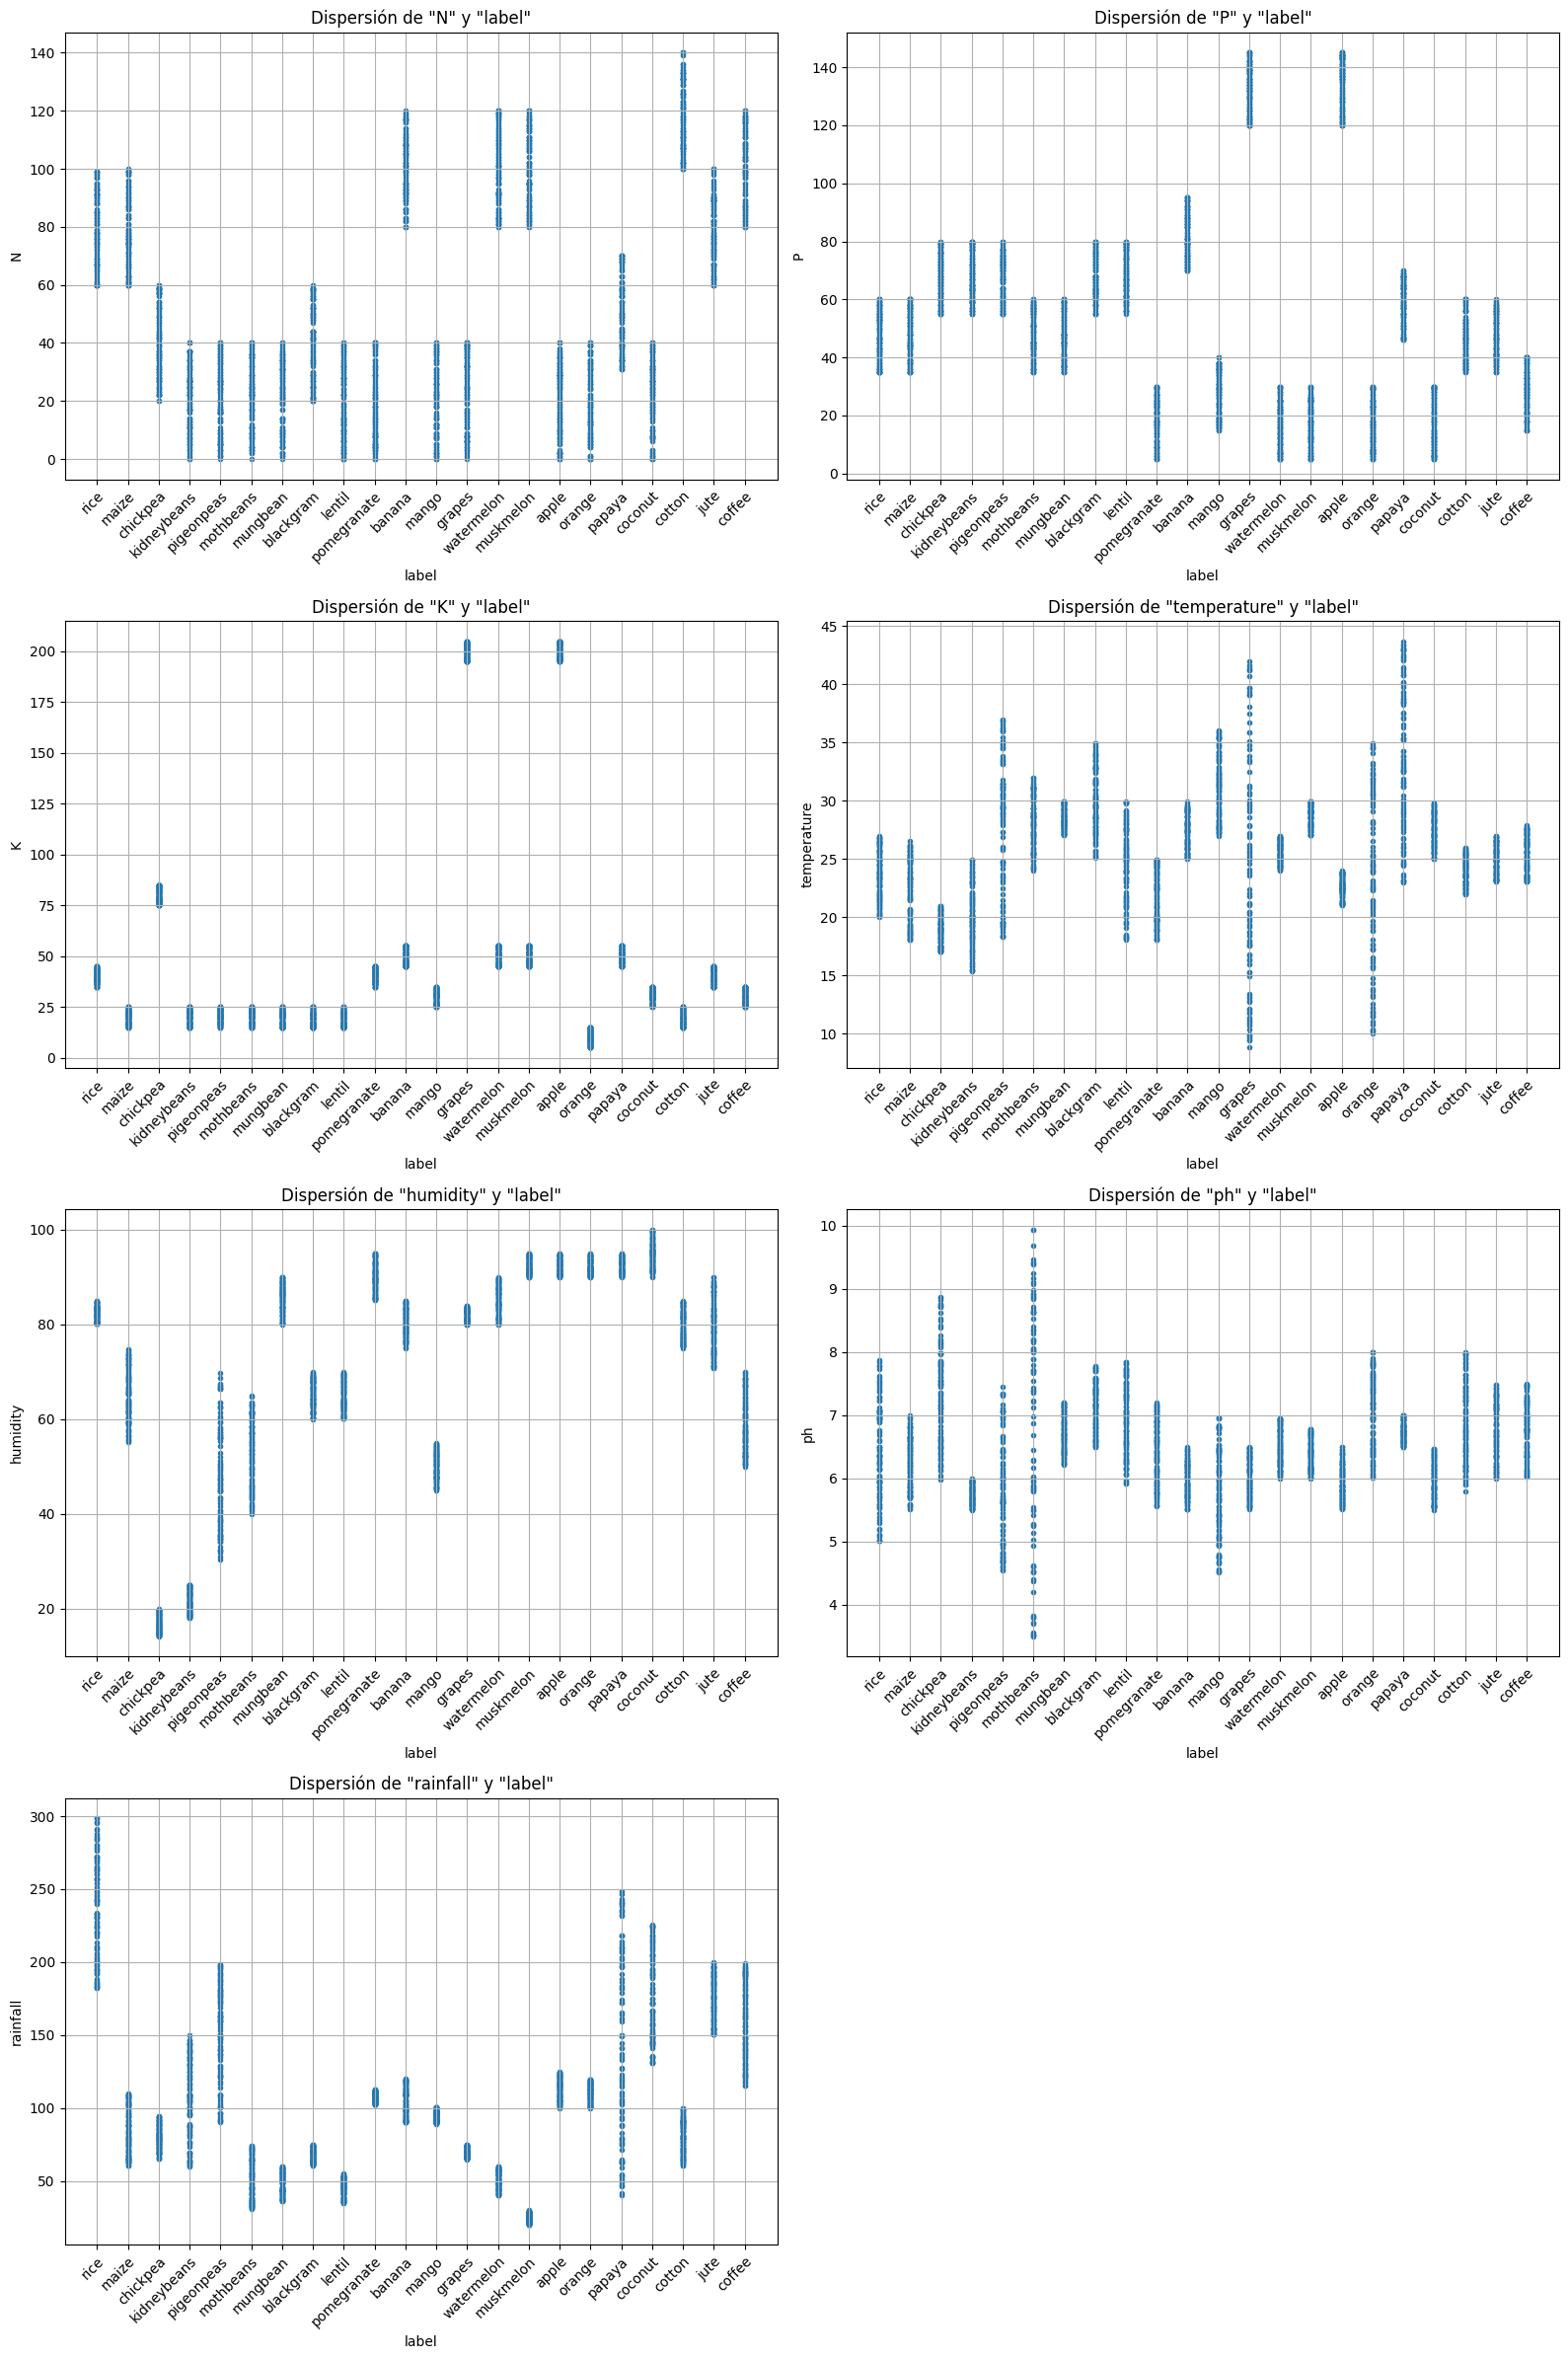

In [59]:
relaciones_con_label = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

num_rows_in_figure = ceil(len(relaciones_con_label) / 2)

fig, axes = plt.subplots(num_rows_in_figure, 2)
fig.set_size_inches(16, num_rows_in_figure * 6)

i = 0
for row in axes:
    for ax in row:
        if i < len(relaciones_con_label):
            col = relaciones_con_label[i]
            ax.scatter(df_labels_numericos["label"], df_labels_numericos[col], marker=".")
            ax.set_title(f"Dispersión de \"{col}\" y \"label\"")
            ax.set_xlabel("label")
            ax.set_xticks(range(len(label_map.keys())), labels=label_map.keys(), rotation=45, ha="right", rotation_mode="anchor")
            ax.set_ylabel(col)
            ax.grid(True)
        else:
            fig.delaxes(ax)

        i += 1

fig.tight_layout()
plt.savefig("graficas/scatter_2.png", dpi=300)
plt.show()